## Observations and Insights 

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "left")

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [112]:
# Checking the number of mice.
merge_data["Mouse ID"].value_counts()

g989    13
y769    10
l509    10
a699    10
q633    10
        ..
u153     1
f932     1
h428     1
v199     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [113]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merge_data[merge_data.duplicated(['Mouse ID','Timepoint'])]
print(duplicate_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [151]:
# Optional: Get all the data for the duplicate mouse ID. 


In [153]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

SyntaxError: invalid character in identifier (<ipython-input-153-e4a936eb2f99>, line 2)

In [116]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

Drug_regimen = merge_data.groupby("Drug Regimen")

mean = Drug_regimen["Tumor Volume (mm3)"].mean()
median = Drug_regimen["Tumor Volume (mm3)"].median()
variance = Drug_regimen["Tumor Volume (mm3)"].var()
stdv = Drug_regimen["Tumor Volume (mm3)"].std()
sem = Drug_regimen["Tumor Volume (mm3)"].sem()

summary1_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary1_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mean = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

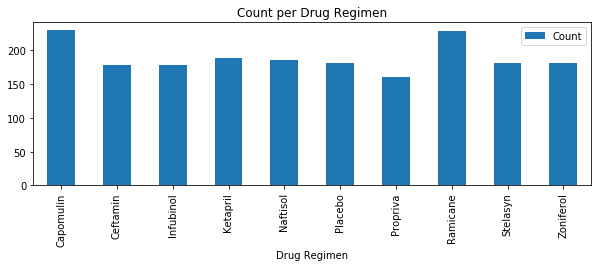

<Figure size 432x288 with 0 Axes>

In [119]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
grouped_df = pd.DataFrame(merge_data.groupby(["Drug Regimen"]).count()).reset_index()
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})

#label
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

# Generate a bar plot
regimen_datapoints.plot(kind="bar", figsize=(10,3))

# Set title 
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()

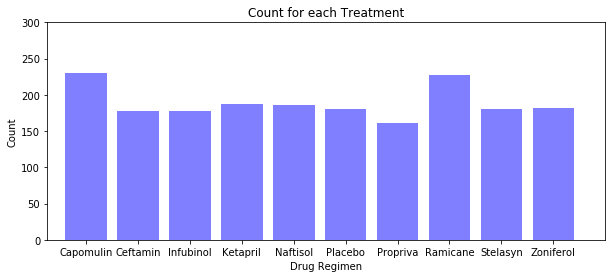

In [120]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimens = summary_df.index.tolist()
regimen_count = (merge_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(regimen_count))

# Define x-axis
x_axis = drug_regimens

# Generate a bar plot
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")

# Title, x label, and y label
plt.title("Count for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

# Set the limits of the x axis & y axis
plt.xlim(-0.75, 10)
plt.ylim(0, 300)

plt.show()



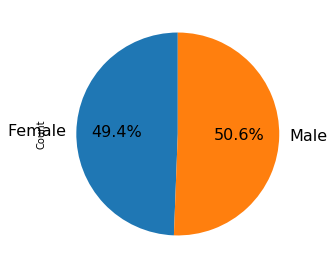

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merge_data.groupby(["Sex"]).count()).reset_index()

gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})

# pie chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)


In [122]:
plt.clf()
plt.cla()
plt.close()

(-1.1874943525713364,
 1.1105268056883157,
 -1.1938032889323704,
 1.112116577938631)

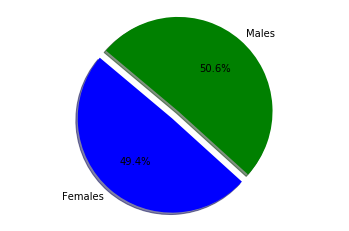

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (merge_data.groupby(["Sex"])["Mouse ID"].count()).tolist()

labels = ["Females", "Males"]
colors = ["Blue", "Green"]
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint 
groupedDrugData = merge_data.groupby(["Drug Regimen", "Timepoint"])

#find avg tumor volume and metastic sites for each drug at each timepoint
drugAvgs = groupedDrugData.mean()
drugAvgs.head(15)

Age_months  Weight (g)  Tumor Volume (mm3)  \
Drug Regimen Timepoint                                               
Capomulin    0           14.040000   20.120000           45.000000   
             5           14.040000   20.120000           44.266086   
             10          14.040000   20.120000           43.084291   
             15          13.666667   20.000000           42.064317   
             20          13.304348   19.782609           40.716325   
             25          13.181818   19.909091           39.939528   
             30          13.181818   19.909091           38.769339   
             35          13.181818   19.909091           37.816839   
             40          12.809524   19.857143           36.958001   
             45          12.809524   19.857143           36.236114   
Ceftamin     0           12.800000   27.400000           45.000000   
             5           12.809524   27.380952           46.503051   
             10          13.200000   27.400000           48.285125   
             15          13.210526   27.263158           50.094055   
             20          13.777778   27.388889           52.157049   

                        Metastatic Sites  
Drug Regimen Timepoint                    
Capomulin    0                  0.000000  
             5                  0.160000  
             10                 0.320000  
             15                 0.375000  
             20                 0.652174  
             25                 0.818182  
             30                 1.090909  
             35                 1.181818  
             40                 1.380952  
             45                 1.476190  
Ceftamin     0                  0.000000  
             5                  0.380952  
             10                 0.600000  
             15                 0.789474  
             20                 1.111111

In [125]:
# Capomulin regimen 
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [126]:
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [127]:
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [128]:
# Select data for Ramicane regimen and reset index
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [129]:
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [130]:
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [131]:
#Infubinol regimen
inf_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
inf_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [132]:
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [133]:
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [134]:
# Ceftamin regimen 
cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [135]:
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [136]:
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


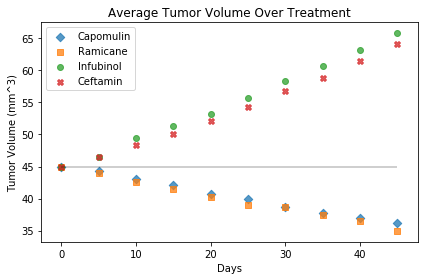

In [137]:
#list drugs to examine
drugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#list timepoints
timepoints = np.arange(0, 50, 5)

#list tumor vol avg by drug and timepoint
tumorVolAvg = drugAvgs["Tumor Volume (mm3)"]
#separate tumor vol avg list by drug
capo_tumorVolAvg = tumorVolAvg.loc["Capomulin", :]
rami_tumorVolAvg = tumorVolAvg.loc["Ramicane", :]
infu_tumorVolAvg = tumorVolAvg.loc["Infubinol", :]
ceft_tumorVolAvg = tumorVolAvg.loc["Ceftamin", :]

#plot each drug's tumor vol avg over time
capo_tumorVolAvgPlot = plt.scatter(timepoints, capo_tumorVolAvg, marker = "D", label = "Capomulin", alpha = .75)
rami_tumorVolAvgPlot = plt.scatter(timepoints, rami_tumorVolAvg, marker = "s", label = "Ramicane", alpha = .75)
infu_tumorVolAvgPlot = plt.scatter(timepoints, infu_tumorVolAvg, marker = "o", label = "Infubinol", alpha = .75)
ceft_tumorVolAvgPlot = plt.scatter(timepoints, ceft_tumorVolAvg, marker = "X", label = "Ceftamin", alpha = .75)

#formatting and titles
plt.hlines(45, 0, 45, alpha=0.25)
plt.title("Average Tumor Volume Over Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm^3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [138]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [139]:
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


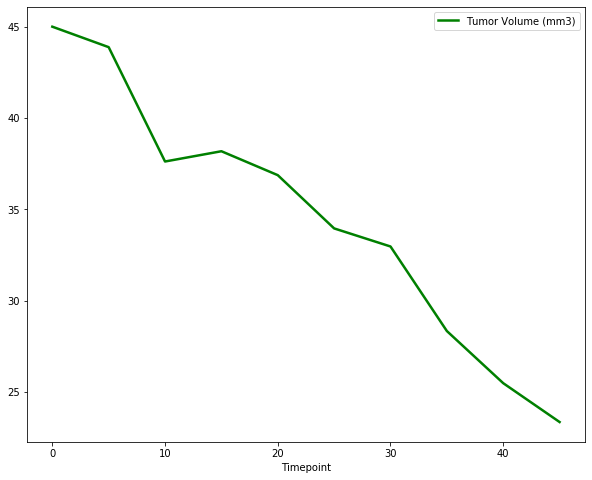

In [140]:
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')

In [141]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [142]:
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [143]:
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [144]:
average_cap = average_cap.set_index('Mouse ID')

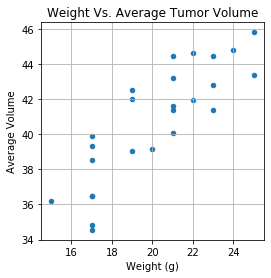

In [145]:
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [146]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

In [147]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


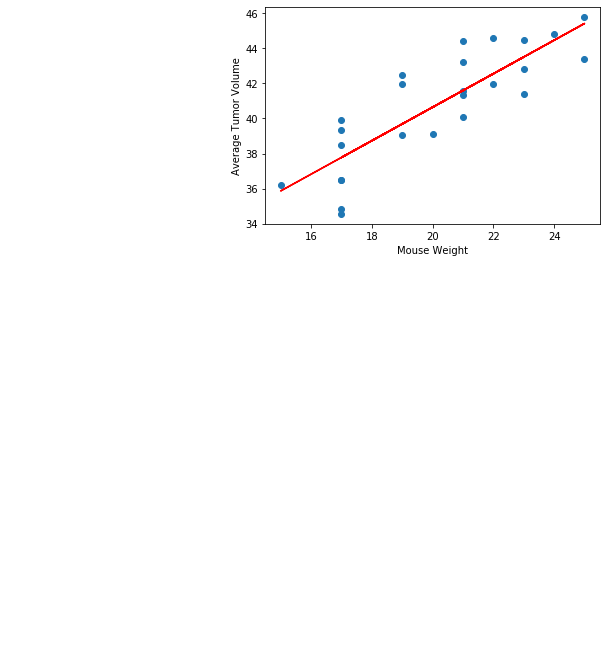

In [148]:
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()